# Prosper Loan Data Exploration
## by Brian Yatich

## Introduction
- This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more. Consult thisdata dictionaryto understand the variables in the dataset.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the data set into a pandas dataframe and display the first 5 rows
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Display the dimension characteristics of the data set and the data types
print(loan_data.shape)
print(loan_data.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
# Display statistics of the data set

loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# Determine more information onm the data set
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# Make a copy of the data set 

loan = loan_data.copy()

In [7]:
# Convert the loan creation date column to datetime

loan['ListingCreationDate'] = loan['ListingCreationDate'].astype('datetime64[ns]')
print(loan['ListingCreationDate'].dtype)

datetime64[ns]


In [8]:
# Determine the different loan statuses

loan['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Drop rows whose status are not 'Defaulted'

In [9]:
#This keeps only the rows with defaulted loans

loan = loan[loan["LoanStatus"].str.contains("Defaulted")]
loan.shape

(5018, 81)

In [10]:
# Rename the column 'ListingCategory' to 'loan_purpose'
loan.rename(columns = {'ListingCategory (numeric)':'loan_purpose'}, inplace = True)

loan['loan_purpose'] = loan['loan_purpose'].astype(str)
print(loan['loan_purpose'].dtype)


object


In [11]:
# print out the index order of loan_purpose  based on value counts

list_category = loan['loan_purpose'].value_counts().index
print(list_category)

Index(['0', '1', '3', '7', '4', '2', '6', '5', '13', '15', '18', '19', '20',
       '14', '16', '10', '17', '12'],
      dtype='object')


In [12]:
# print out the index order of IncomeRange based on value count

income_index = loan['IncomeRange'].value_counts().index
print(income_index)

Index(['Not displayed', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
       '$1-24,999', '$100,000+', '$0', 'Not employed'],
      dtype='object')


In [13]:
# Create a column 'BorrowYear' for the actual years the loans were taken

loan['BorrowYear'] = loan['LoanOriginationQuarter'].str[3:]


In [14]:
# Rename the Listing category column to a more appropriate name and c

loan.rename(columns = {'ListingCategory (numeric)':'loan_purpose'}, inplace = True)

# Convert the Listing Category column to string data format
loan['loan_purpose'] = loan['loan_purpose'].astype(str)
print(loan['loan_purpose'].dtype)

object


In [15]:
# Replace the Listing Category numbers with their actual string values

loan['loan_purpose'] = loan['loan_purpose'].replace(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                                                           '11', '12', '13', '14', '15', '16', '17', '18', '19', '20' ], 
                                                          ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business',
                                                           'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat',
                                                           'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses',
                                                           'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation',
                                                           'Wedding Loans'])

In [16]:

ordinal_var_dict = {'loan_purpose' : ['Debt Consolidation', 'Business', 'Other', 'Personal Loan',
                                      'Home Improvement', 'Auto', 'Student Use','Household Expenses',
                                      'Medical/Dental', 'Taxes', 'Vacation','Wedding Loans',
                                      'Large Purchases', 'Motorcycle', 'Cosmetic Procedure','RV', 'Green Loans'],
                    
                    'BorrowYear' : ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                    'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+'],
                    'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], 
                   'ProsperScore': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

### Structure of your dataset?

- The data set is made up of 112,937 rows and 81 columns. There are several features that affect these loan perfromances in a number of different ways.<br>
- Loans have a prosper grade rating from AA, A, B, C, D , E, HR in a decreasing scale of grading from AA to HR<br>
- I arranged some column values to the loan_purpose, BorrowYear, IncomeRange, ProsperRating, ProsperScore to convey the information better with the use of a for loop<br>

### Main feature of interest in your dataset?

My main feature of interest in this data set is defaulted loans. There are a total of 5,018 defaulted loans. I shall be looking into the factors that affected these defaulted loans

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features of interest include : borrower interest rate, loan amount, monthly income, annual income, loan term, loan purpose, borrow year and others that will be explored in the following cells

## Univariate Exploration

These Univariate plots will show some basic characteristics of these defaulted loans


In [17]:
# Define functions for different plots of data

base_color = sb.color_palette()[0]
# Countplot for variables on the y axis

def UniCount(x, figsize):
    plt.figure(figsize=figsize)
    sb.countplot(data = loan, x=x, color =base_color)
    plt.title("Countplot for "+x)
    plt.xlabel(x, fontsize=16)
    plt.show()

# Countplot for variables on the y axis

def UniCountY(y, figsize):
    plt.figure(figsize=figsize)
    sb.countplot(data = loan, y=y, color = base_color)
    plt.title("Countplot for "+y)
    plt.xlabel(y, fontsize=16)
    plt.show()

### Question 1: What is the distribution of defaulted loans with respect to 'Term' ?

- ### Visualization

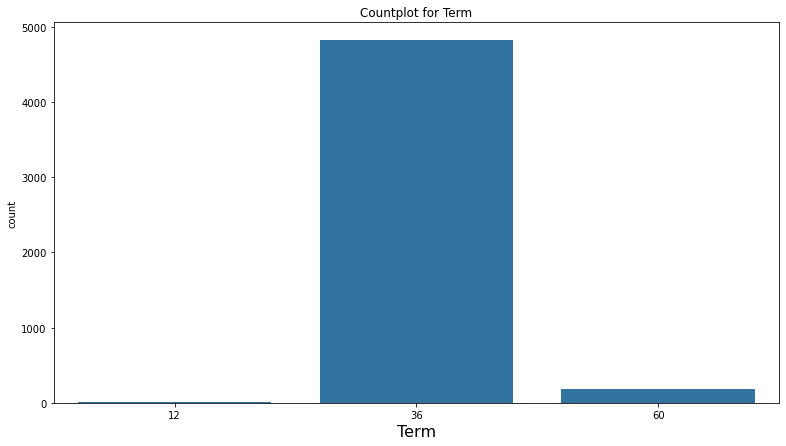

In [18]:
UniCount('Term', (13, 7))

- ### Observation

The 36 month term loans seem to have the highest rate of loan defaults

### Question 2: What is the distribution of loan defaulters with respect to purpose of the loan?

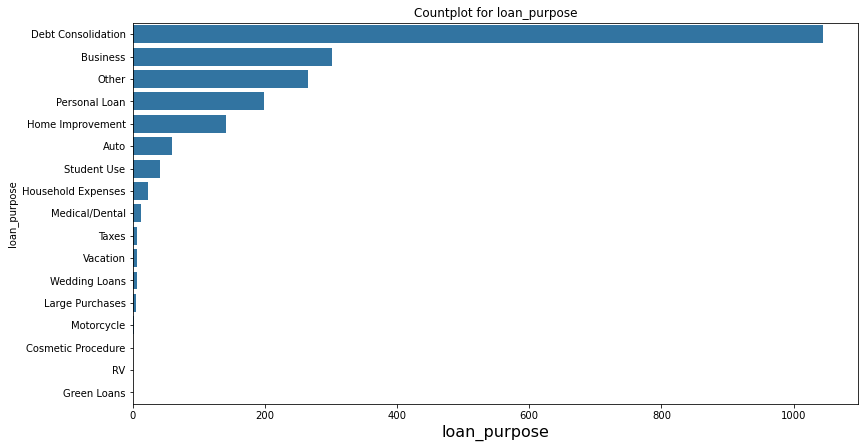

In [19]:
#Plot the counts of defaulted loans with repsect to purpose of the loan

UniCountY('loan_purpose', (13, 7))

### Question 3 : What is the distribution of loan defaults by year

- ### Visualization

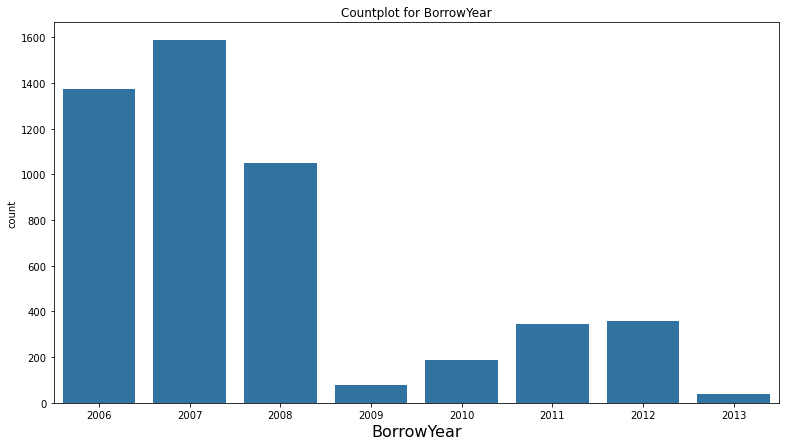

In [20]:
UniCount('BorrowYear', (13, 7))

- ### Observation

The years 2006 - 2008 had a significant rate of loan defaults in comparison to previous years, with the year 2007 having the highest frequency of loan defaults

### Question 4 : What is the distribution of loan defaults by the state in which the defaulters reside in

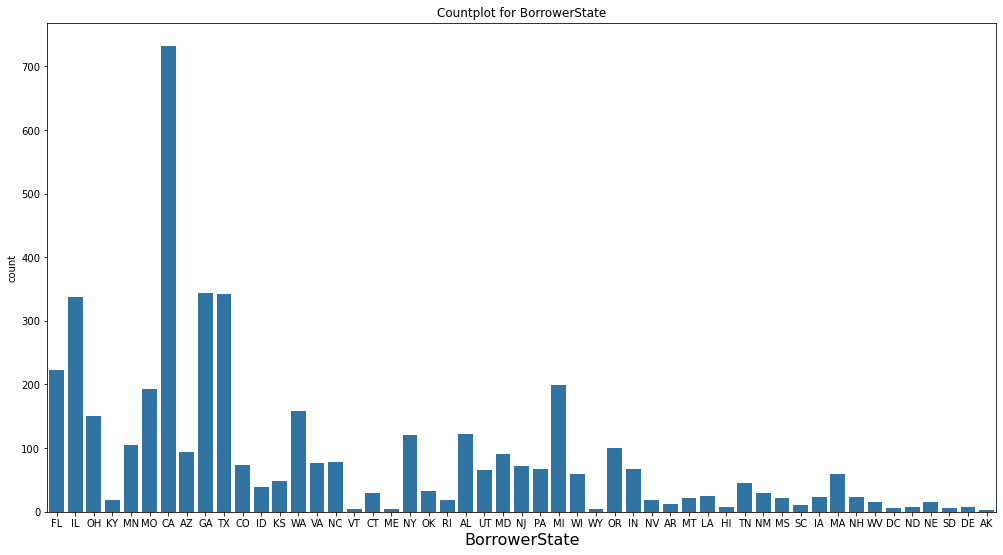

In [21]:
UniCount('BorrowerState', (17,9))

The State of California had the highest loan default numbers than the other states.

### Question 5 : What is the distribution of loan defaults based on income range

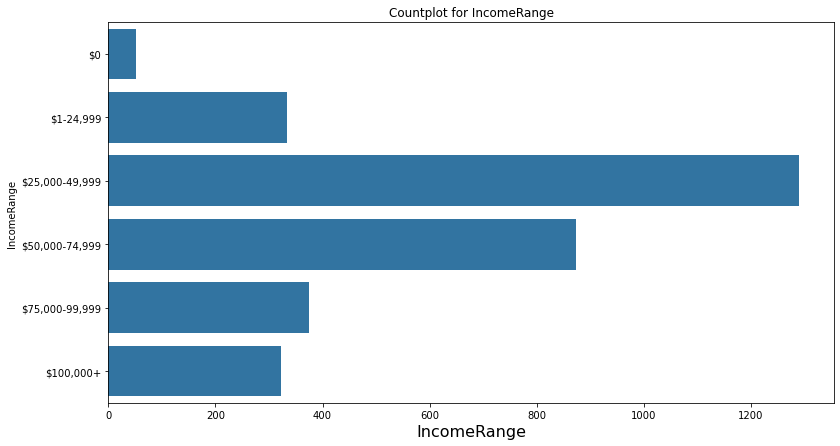

In [22]:
UniCountY('IncomeRange', (13, 7))

Individuals with an income of between $25,000 - 49,999 had the highest frequency of loan defaults

### Question 6: What is the distribution of defaulted Loan amount


In [23]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan['LoanAmount_Range'] = pd.cut(loan['LoanOriginalAmount'], bins, labels=bucket_l)

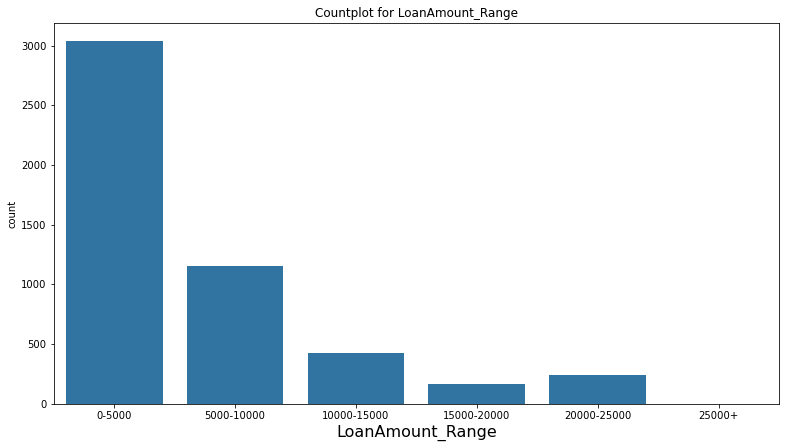

In [24]:
UniCount('LoanAmount_Range', (13, 7))

Loan amounts within the range of $0 - 5000 have the highest rate of defaults.There is also a generaldecrease in the number of loans with increase in amount

### Question 7:  What is the relationship between Prosper Rating and loan default count?

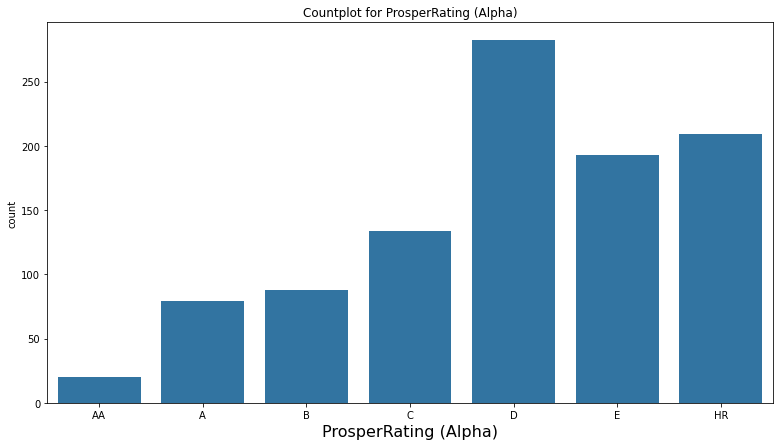

In [25]:
UniCount('ProsperRating (Alpha)', (13, 7))

Loans with a prosper rating of D had the highest rate of loan defaults

### Question 8 : What is the distribution of defaulted loans with repect to stated monthly income

In [26]:
loan['StatedMonthlyIncome'].describe()

count     5018.000000
mean      4366.768683
std       3266.986974
min          0.000000
25%       2500.000000
50%       3708.333333
75%       5416.666667
max      58616.666667
Name: StatedMonthlyIncome, dtype: float64

In [27]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000]
bucket_l = ['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000+']
loan['MonthlyIncome_Range'] = pd.cut(loan['StatedMonthlyIncome'], bins, labels=bucket_l)

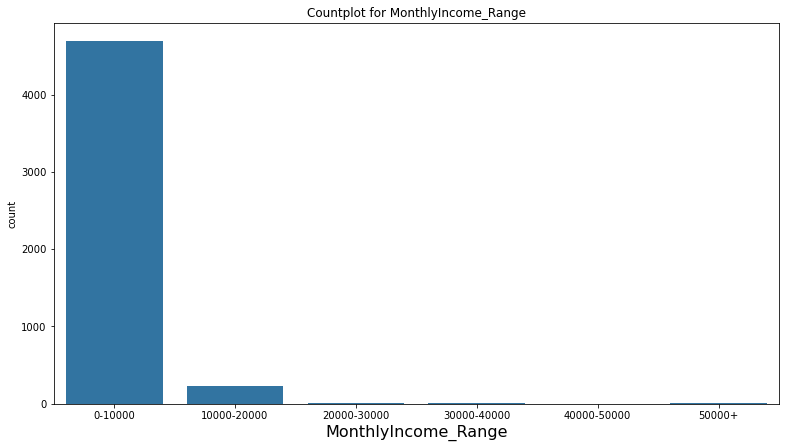

In [28]:
UniCount('MonthlyIncome_Range', (13, 7))

Loan defaulters with a monthly income range of 0-10,000 had the highest frequency of defaults.<br>
A general decrease in loan defaults is seen with and increase in monthly income

### Discussion

- The 36 month loan term loans had the highest rate of defaults<br>
- The years 2006 - 2008 had a significant rate of loan defaults in comparison to previous years, with the year 2007 having the highest frequency of loan defaults<br>
- The State of California had the highest loan default numbers than the other states.<br>
- Individuals with an income of between 25,000 - 49,999 had the highest frequency of loan defaults<br>
- Loan amounts within the range of 0 - 5000 have the highest rate of defaults<br>
- Loans with a prosper rating of D had the highest rate of loan defaults<br>
- Loan defaulters with a monthly income range of 0-10,000 had the highest frequency of defaults. A general decrease in loan defaults is seen with and increase in monthly income<br>
-
### Operations performed

- I filtered out the loan statuses that were not loan deaults in order to focus on defaulted loans only. I also renamed the ListCategory to the more clear description 'loan_purpose
- I changed the data type of the ListingCreatingDate to datetime
- I also ordered the loan_purpose, BorrowYear, IncomeRange and ProsperRating column contents to more convenient orders 

## Bivariate Exploration

### Question 1 : What is the relationship between the Prosper rating and Interest Rate

In [29]:
def BoxPlot(x, y):
    plt.figure(figsize=(15,7))
    sb.boxplot(x=x, y=y, data=loan, color = base_color)
    plt.title("Box plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def CountPlot(x, hue, figsize):
    plt.figure(figsize=figsize)
    sb.countplot(data = loan, x=x, hue=hue, palette = 'colorblind')
    plt.title("Countplot for "+x+" for each "+hue)
    plt.yscale('log')
    plt.xlabel(x, fontsize=16)
    plt.show()

- ### Visualization

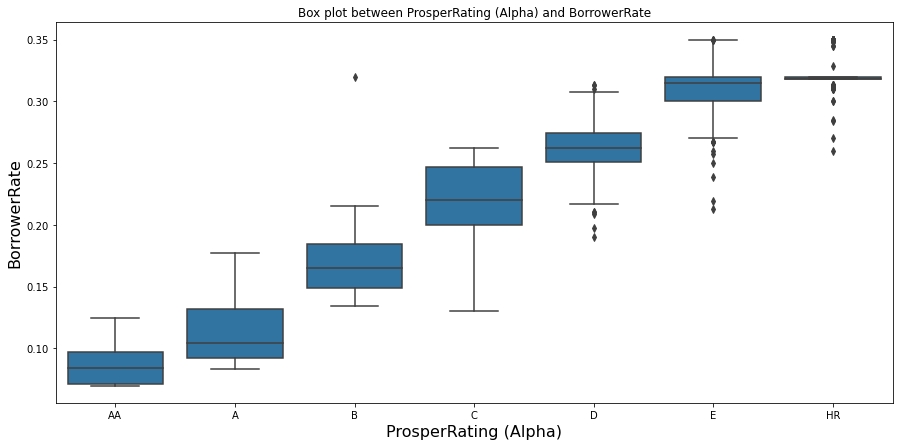

In [30]:
BoxPlot('ProsperRating (Alpha)', 'BorrowerRate')

- ### Observation

The average interest rate on defaulted loans increases with every decrease in ProsperRating

### Question 2 : What is the relationship between income range with respect to purpose of the loan

- ### Visualization

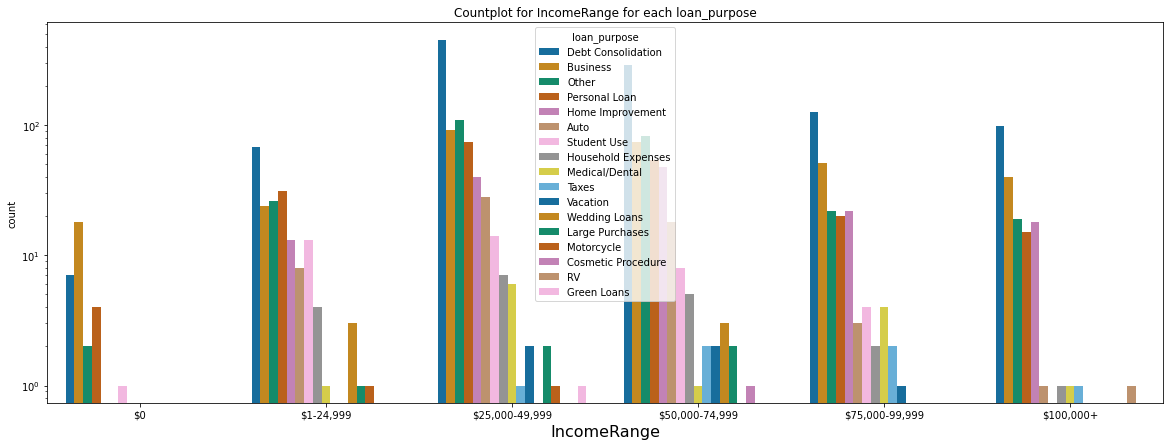

In [31]:
CountPlot('IncomeRange', 'loan_purpose', (20, 7))

- ### Obervation

Most of the defaulted loans had the loan purpose as debt consolidation

### Question 3 : What is the relationship between Term and Income Range of defaulted loans

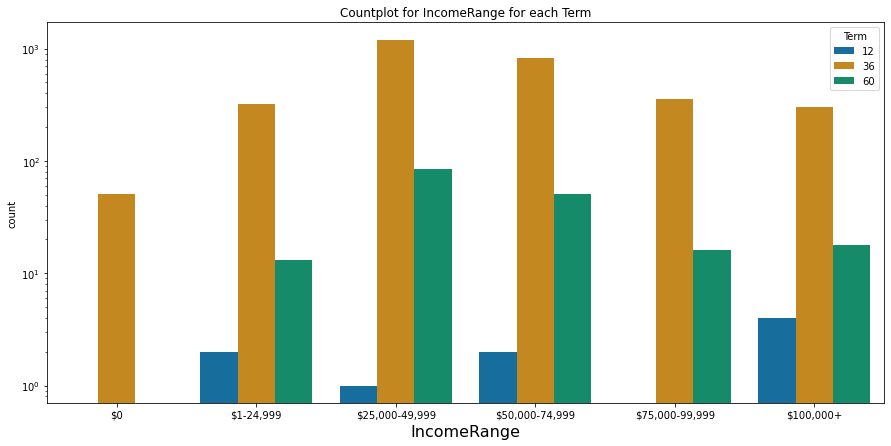

In [32]:
CountPlot('IncomeRange', 'Term', (15, 7))

In each income range, the loan term with the highest defaults is 36 months

- ### Question 4: What is the distribution of interest rate with respect to income range

- ### Visualization

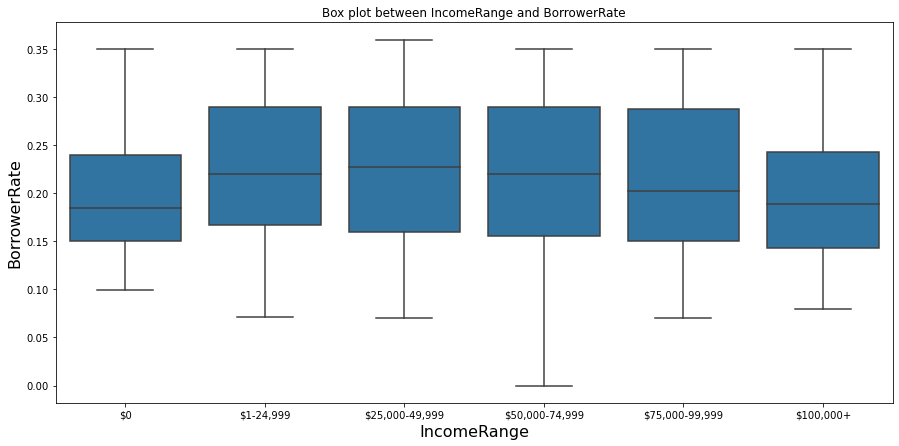

In [33]:
BoxPlot('IncomeRange', 'BorrowerRate')

- ### Observation

Loan defaulters with an income range of $25,000 - 49,999 had the highest inerest rate on their loans

### Question 5 : What is the relationship between the borrow year and the term of the loan

- ### Visualization

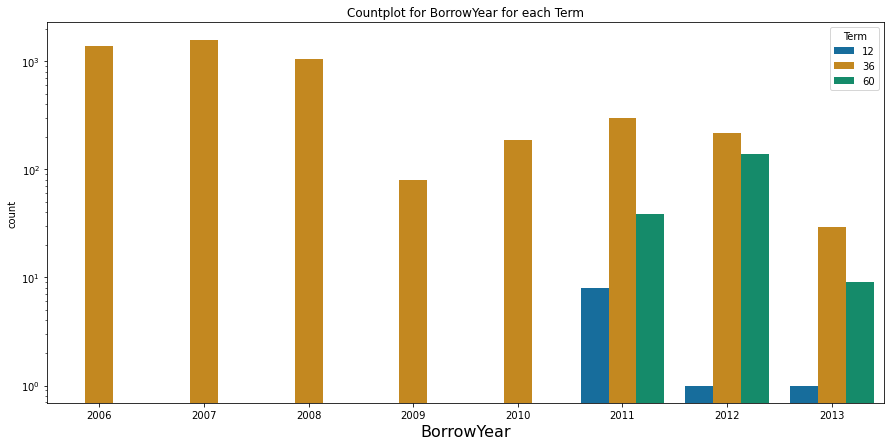

In [34]:
CountPlot('BorrowYear', 'Term', (15, 7))

- ### Observation

From loans taken from the years 2006 -2010, loans with a 36 month term were the only loan defaults

### Question 6 : What is the correlation between loan amount range and the interest rate


- ### Visualization

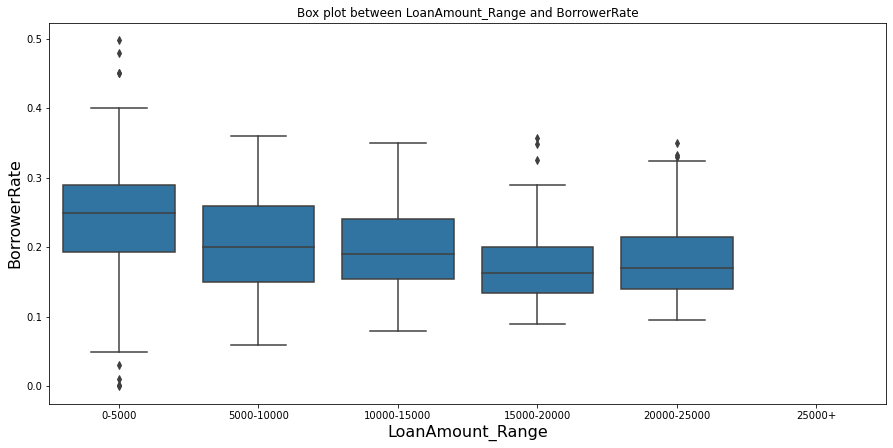

In [35]:
BoxPlot("LoanAmount_Range", "BorrowerRate" )

- ### Observation 

There was a steady decrease in the average interest rate on the defaulted loans for each increase in loan range amount, with the exception of the $20,000-25,000 range which has a lower average interest rate than it's preceeding loan amount range

### Question 7: What is the distribution of Borrower interest rate with respect to the BorrowYear

- ### Visualization

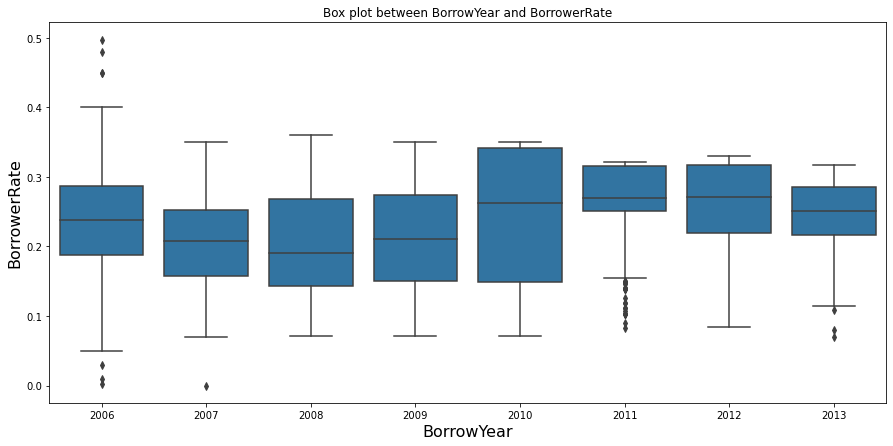

In [36]:
BoxPlot('BorrowYear', 'BorrowerRate')

- ### Observation

The years 2011 and 2012 had the average highest interest rates on loans that were defaulted. The year 2010 had a more diverse range of loan interest rates

### Question 8: What is the distribution of interest rates with respect to the stated mothly income

- ### Visualization

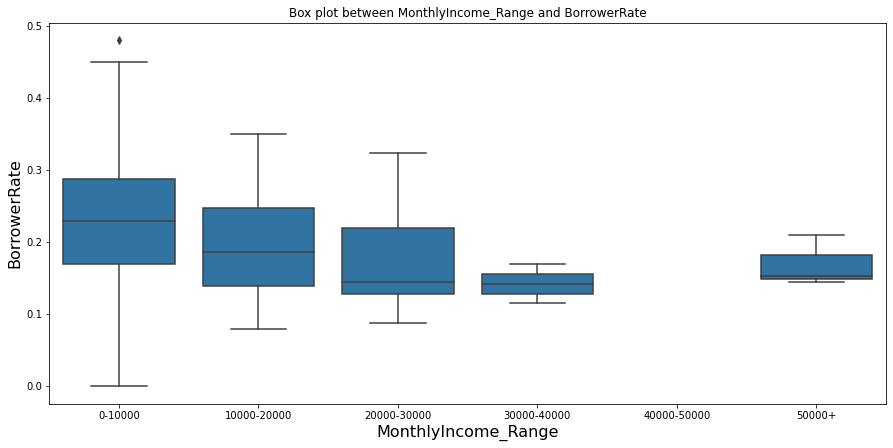

In [37]:
BoxPlot('MonthlyIncome_Range', 'BorrowerRate')

- ### Observation

Loanees who defaulted on loans had a steady monthly income of between $0 - 10,000. They also had the highest interest rate on their loans compared to the other ranges.<br>
There was also a steady decrease in the interest rate with increase in monthly income range

### Question 9: What is the distribution between monthly loan payments and original loan amount of defaulted loans?

- ### Visualization 

Text(0.5, 0, 'LoanOriginalAmount')

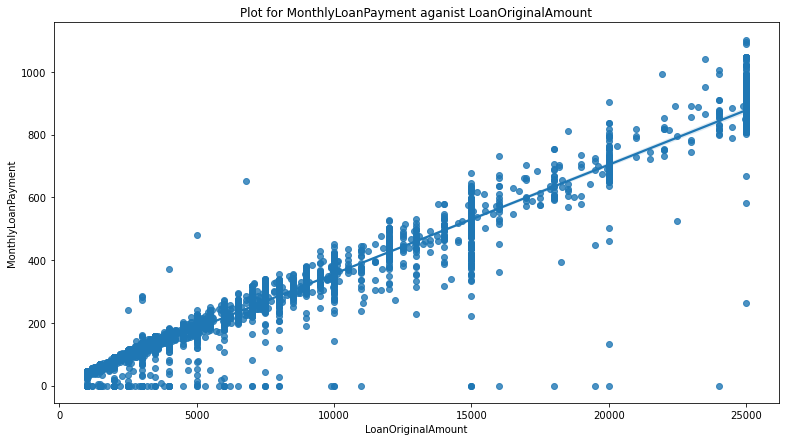

In [38]:
plt.figure(figsize = (13, 7))
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment')
plt.title('Plot for MonthlyLoanPayment aganist LoanOriginalAmount')
plt.ylabel('MonthlyLoanPayment')
plt.xlabel('LoanOriginalAmount')

- ### Observation

There was a positive correlation between loan amounts and monthly loan payments for defaulted loans.Each icrease in loan amount produced a corresponding increasing in monthly payments

### Question 10: What is the relationship between interest rates and loan purpose

- ### Visualization

Text(0.5, 1.0, 'Plot for loan purpose against interest rates')

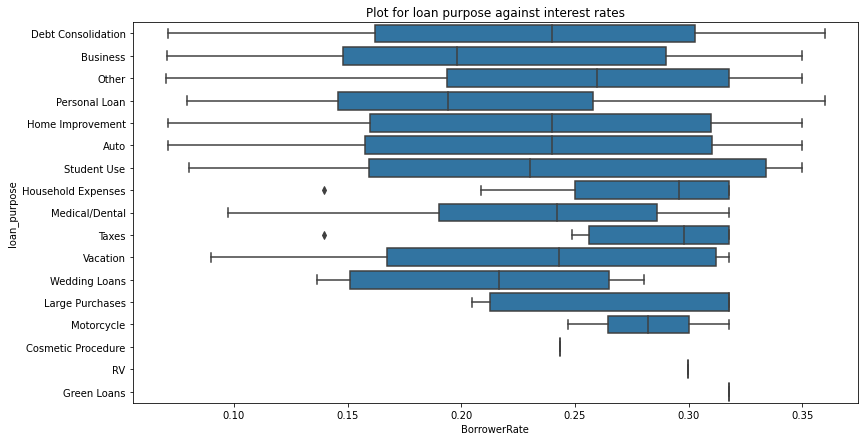

In [39]:
plt.figure(figsize = (13, 7))
sb.boxplot(data = loan, y = 'loan_purpose', x = 'BorrowerRate', color = base_color );
plt.title('Plot for loan purpose against interest rates')

- ### Observation

The average interest rates for loans meant for taxes were the highest and the lowest for personal loans

### Question 11 : What is the relationship between Term and interest rate


- ### Visualization


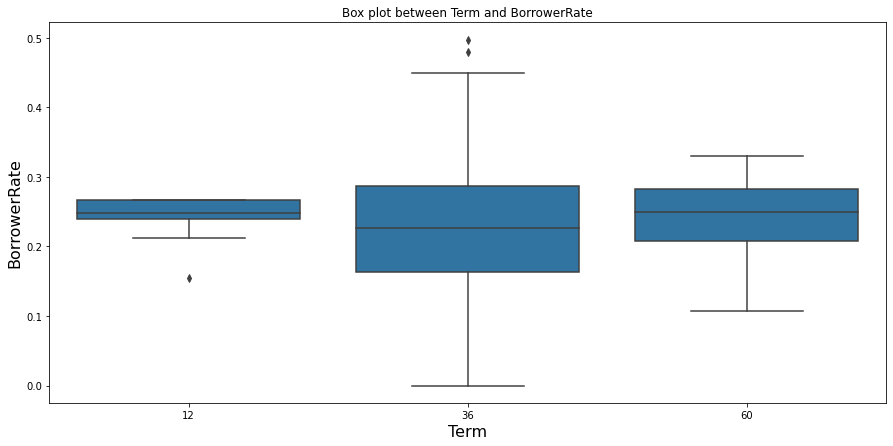

In [40]:
BoxPlot('Term', 'BorrowerRate')

- ### Observation

The 60 month loan term has the highest average interest rate

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- The average interest rate on defaulted loans increases with every decrease in ProsperRating<br>

- Most of the defaulted loans had the loan purpose as debt consolidation <br>

- In each income range, the loan term with the highest defaults is 36 months<br>

- From loans taken from the years 2006 -2010, loans with a 36 month term were the only loan defaults<br>

- There was a steady decrease in the average interest rate on the defaulted loans for each increase in loan range amount,except the 20,000-25,000 range which has a lower average interest rate than it's preceeding loan amount range <br>

- The years 2011 and 2012 had the highest interest rates on loans that were defaulted. The year 2010 had a more diverse range of loan interest rates<br>

- Loanees who defaulted on loans had a steady monthly income of between 0 - 10,000. They also had the highest interest rate on their loans compared to the other ranges.There was also a steady decrease in the interest rate with increase in monthly income range<br>
- The average interest rates for loans meant for taxes were the highest and the lowest for personal loans

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?



## Multivariate Exploration
First, I used a heat map ro show the strongest correlation

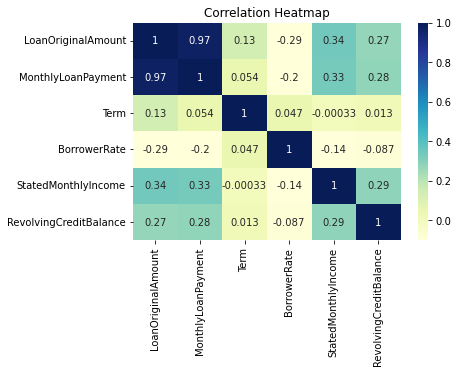

In [41]:
continuous_f = ["LoanOriginalAmount", "MonthlyLoanPayment", 
                "Term", "BorrowerRate", "StatedMonthlyIncome",
                "RevolvingCreditBalance",]
loan_corr = loan[continuous_f].corr()
sb.heatmap(loan_corr,vmin=-0.1,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

- ### Observation

The strongest featured correlation in defaulted loans Prosper Loan Data set is the relation between Monthly payments and the loan amounts

## Conclusion


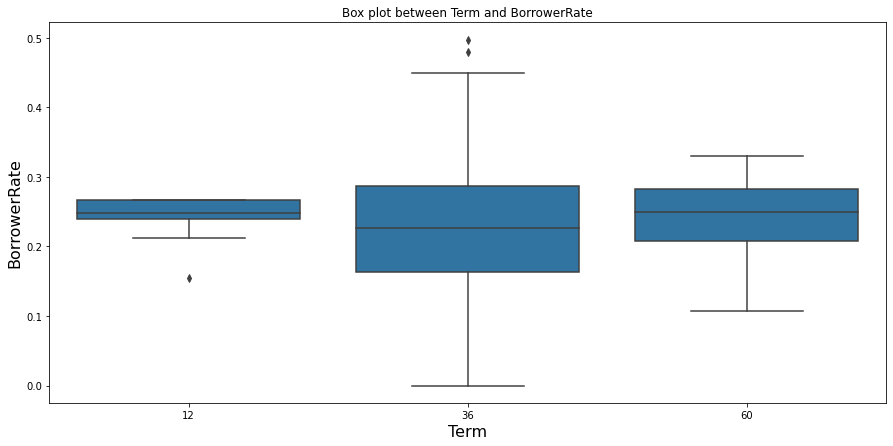

In [42]:
BoxPlot('Term', 'BorrowerRate')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest

There were a number of features that collaborated with my findings:
- Interest rates were the driving feature of defaulted loans. Higher interest rates across annual income and monthly incomes were responsible for loan defaults 
- The strongest correlation was between monthly payments and loan amounts
- The 36 month loan term was subject to a large number of loan defaults

### Were there any interesting or surprising interactions between feature(s)

Surprisingly, the 36 month loan term does not have the highest average interest rate